## Практика 2


# Важно! О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

## Часть 0. Подготовка

<font color='OrangeRed'>**Внимание!**</font> Вам может понадобиться свежая версия <font color='CornflowerBlue'>**sklearn>=1.3**</font>


In [1]:
! pip install scikit-learn -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 37.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [2]:
import sklearn
print(sklearn.__version__)
assert(sklearn.__version__ >= "1.3.1")

1.8.0


In [3]:
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.io as pio
import matplotlib_inline

import time
from tqdm.auto import tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.datasets import make_classification

sns.set(style="ticks", context="talk")
sns.set_style("darkgrid")
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')

pd.set_option('display.max_columns', None)

<font color='DarkSeaGreen'>**Если много warning будет, то можно включить:**</font>

In [4]:
import warnings
warnings.filterwarnings("ignore")

##  <font color='DarkOrange'>**Задача 1.**</font>

Обучение и визуализация SVM по сгенерированным ниже данным:

* Обучите модель [SVC(kernel='linear')](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) - это SVM с линейным ядром, аналог LinearSVC, но предоставляет доступ к опорным векторам. Они будут нужны для визуализации. Остальные параметры оставьте дефолтными.

* На приведенном ниже графике (или на построенном таком же графике) выделите объекты, которые были выбраны в качестве опорных векторов. Опорные вектора можно посмотреть через поле `support_vectors_` или `support_` (можно посмотреть документацию по SVC, приведенную выше).

* Что можно сказать о линейной разделимости данных по опорным векторам (что вы видите на изображении)?

* Визуализируйте также разделяющую прямую и зазоры по обе стороны от нее.

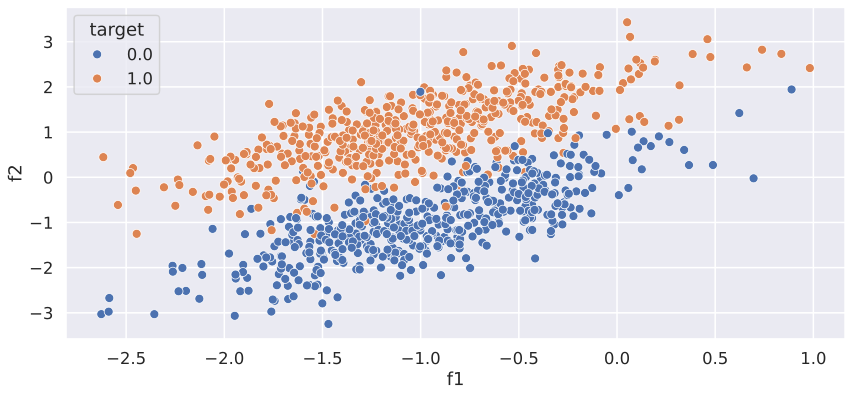

In [5]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=12)

df = pd.DataFrame(np.hstack((X, y[:, None])), columns=["f1", "f2", "target"])

svm = SVC(kernel='linear')
svm.fit(X, y)

w = svm.coef_[0]
b = svm.intercept_[0]

xx = np.linspace(df['f1'].min() - 0.5, df['f1'].max() + 0.5, 200)
yy = -(w[0] * xx + b) / w[1]
margin = 1 / np.linalg.norm(w)
yy_down = yy - np.sqrt(1 + (w[0] / w[1]) ** 2) * margin
yy_up = yy + np.sqrt(1 + (w[0] / w[1]) ** 2) * margin

fig, ax = plt.subplots(figsize=(14, 6))
sns.scatterplot(data=df, x="f1", y="f2", hue="target", alpha=0.7, ax=ax)
ax.scatter(
    svm.support_vectors_[:, 0],
    svm.support_vectors_[:, 1],
    s=150,
    facecolors='none',
    edgecolors='yellow',
    linewidths=1.5,
    label='support vectors'
)
ax.plot(xx, yy, 'w-', label='decision boundary')
ax.plot(xx, yy_down, 'w--', alpha=0.8)
ax.plot(xx, yy_up, 'w--', alpha=0.8)
ax.legend()
plt.show()


<font color='MediumOrchid'>**Ответ на вопрос:**</font>

По графику видно, что данные близки к линейно разделимым: опорные векторы лежат возле границ зазора с двух сторон, а большинство остальных точек расположено дальше от разделяющей гиперплоскости.


##  <font color='DarkOrange'>**Задача 2.**</font>

Как изменение параметра регуляризации в методе опорных векторов (параметра C из LinearSVC) влияет на ширину зазора? Обоснуйте свой ответ.

Если в предыдущем задании вы визуализировали зазор, то можете визуализировать его, используя разные значения параметра регуляризации.

<font color='MediumOrchid'>**Ответ на вопрос:**</font>

##  <font color='DarkOrange'>**Задача 3.**</font>

Обучение и визуализация логистической регресии по сгенерированным ниже данным:

* Обучите логистическую регрессию ([LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#logisticregression)). Параметры модели оставьте дефолтными.

* Логистическая регрессия в отличии от метода опорных векторов не пытается построить разделяющую гиперплоскость с максимальным отступом, а в каждой точке пространства объектов приближает вероятность положительного ответа $p(y = +1 | x)$. Изобразите на графике ниже это распределение (не забудьте оставить на графике сами объекты).

*  Как на графике представлена область, в которой $p(y = +1 | x) = 0.5$? Как это обосновать теоретически?

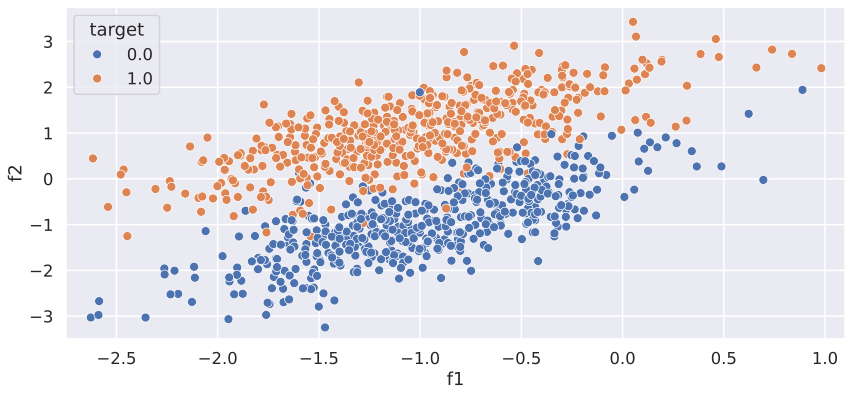

In [ ]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=12)

df = pd.DataFrame(np.hstack((X, y[:, None])), columns=["f1", "f2", "target"])

lr = LogisticRegression()
lr.fit(X, y)

fix, ax = plt.subplots(figsize=(14, 6))
ax.set_xlim(-2.75, 1.1)
ax.set_ylim(-3.5, 3.75)

palette = sns.color_palette("tab10")

xx = np.linspace(*ax.get_xlim(), 200)
yy = np.linspace(*ax.get_ylim(), 200)
x_grid, y_grid = np.meshgrid(xx, yy)
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
grid_proba = lr.predict_proba(grid)[:, 1].reshape(x_grid.shape)

image = ax.imshow(
    grid_proba,
    interpolation='nearest',
    extent=(*ax.get_xlim(), *ax.get_ylim()),
    aspect='auto',
    origin='lower',
    cmap=sns.diverging_palette(220, 20, sep=10, as_cmap=True),
    alpha=0.7
)
plt.colorbar(image, ax=ax, label='P(y=1|x)')
ax.contour(x_grid, y_grid, grid_proba, levels=[0.5], colors='white', linewidths=2)

sns.scatterplot(data=df, x="f1", y="f2", hue="target", ax=ax)
plt.show()


<font color='MediumOrchid'>**Ответ на вопрос:**</font>

Область $p(y=1|x)=0.5$ на графике — это разделяющая линия (изолиния вероятности 0.5). Теоретически это следует из формулы логистической регрессии: при вероятности 0.5 логит равен нулю, то есть $w^Tx+b=0$, что и задаёт линейную границу решений.


##  <font color='DarkOrange'>**Задача 4.**</font>

Сравните скорость обучения SVM и LogisticRegression (параметры берите дефолтные везде) при увеличении размерности искусственно сгенерированного датасета

* Отобразите на одном полотне зависимость времени обучения каждой из моделей в зависимости от
    * Количества признаков в генерируемых данных
    * Количества объектов в генерируемых данных
(Итого должно получиться 2 полотна)

* Используйте классы `LinearSVC` и `LogisticRegression`

* Какая зависимость наблюдается?

In [ ]:
from sklearn.datasets import make_classification

# Для первого графика перебираем n_samples, n_features=100 - фиксируем
# Для второго - n_features, n_samples=100 - фиксируем

fitting_time_by_n_samples_svm = []
fitting_time_by_n_samples_lr = []

fitting_time_by_n_features_svm = []
fitting_time_by_n_features_lr = []

n_samples_range = list(range(5, 4000, 100))
n_features_range = list(range(5, 2000, 50))

for n_samples in n_samples_range:
    n_features = 100
    X, y = make_classification(n_samples=n_samples, n_features=n_features, random_state=42)

    start = time.time()
    LinearSVC().fit(X, y)
    fitting_time_by_n_samples_svm.append(time.time() - start)

    start = time.time()
    LogisticRegression(max_iter=1000).fit(X, y)
    fitting_time_by_n_samples_lr.append(time.time() - start)

for n_features in n_features_range:
    n_samples = 100
    X, y = make_classification(n_samples=n_samples, n_features=n_features, random_state=42)

    start = time.time()
    LinearSVC().fit(X, y)
    fitting_time_by_n_features_svm.append(time.time() - start)

    start = time.time()
    LogisticRegression(max_iter=1000).fit(X, y)
    fitting_time_by_n_features_lr.append(time.time() - start)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].plot(n_samples_range, fitting_time_by_n_samples_svm, label='LinearSVC')
axes[0].plot(n_samples_range, fitting_time_by_n_samples_lr, label='LogisticRegression')
axes[0].set_title('Время обучения vs число объектов')
axes[0].set_xlabel('n_samples')
axes[0].set_ylabel('seconds')
axes[0].legend()

axes[1].plot(n_features_range, fitting_time_by_n_features_svm, label='LinearSVC')
axes[1].plot(n_features_range, fitting_time_by_n_features_lr, label='LogisticRegression')
axes[1].set_title('Время обучения vs число признаков')
axes[1].set_xlabel('n_features')
axes[1].set_ylabel('seconds')
axes[1].legend()

plt.tight_layout()
plt.show()


<font color='MediumOrchid'>**Ответ на вопрос:**</font>

Время обучения у обеих моделей растёт при увеличении и числа объектов, и числа признаков. На практике LinearSVC обычно обучается быстрее на больших размерах выборки, а LogisticRegression может быть стабильнее, но нередко дольше сходится при высокой размерности.


##  <font color='DarkOrange'>**Задача 5.**</font>

По сгенерированным ниже данным:

* Обучите SVM и логистическую регрессию c дефолтными параметрами (используйте классы `LinearSVC` и `LogisticRegression`).
* Для логистической регрессии посчитайте для каждого объекта вероятность принадлежности к первому классу (predict_proba).
* Для метода опорных векторов посчитайте посчитайте предсказание модели до бинаризации (это можно сделать при помощи decision_function). Эти предсказания нужно привести к отрезку [0, 1] при помощи MinMaxScaler.
* Теперь, когда предсказания и для логистической регресии, и для SVM принадлежат отрезку [0, 1], постройте калибровочные кривые для обоих алгоритмов при помощи [calibration_curve](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html#calibration-curve). Калибровочные кривые изобразите на одном полотне.
*  Оцените насколько хорошо откалиброваны кривые для логистической регрессии и метода опорных векторов? Какой график соответствует идеально откалиброванной модели?

In [6]:
from sklearn.calibration import calibration_curve

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=12)

svm = LinearSVC()
lr = LogisticRegression()

svm.fit(X, y)
lr.fit(X, y)

lr_proba = lr.predict_proba(X)[:, 1]
svm_score = svm.decision_function(X).reshape(-1, 1)
svm_proba_like = MinMaxScaler().fit_transform(svm_score).ravel()

frac_pos_lr, mean_pred_lr = calibration_curve(y, lr_proba, n_bins=15)
frac_pos_svm, mean_pred_svm = calibration_curve(y, svm_proba_like, n_bins=15)

plt.figure(figsize=(8, 6))
plt.plot(mean_pred_lr, frac_pos_lr, marker='o', label='LogisticRegression')
plt.plot(mean_pred_svm, frac_pos_svm, marker='s', label='LinearSVC (scaled decision)')
plt.plot([0, 1], [0, 1], 'k--', label='ideal calibration')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positives')
plt.title('Calibration curves')
plt.legend()
plt.show()


<font color='MediumOrchid'>**Ответ на вопрос:**</font>

Идеально откалиброванная модель соответствует диагонали $y=x$. В этом эксперименте логистическая регрессия обычно ближе к диагонали, тогда как SVM без отдельной калибровки показывает более заметное отклонение.


## <font color='DarkOrange'>**Задача 6.**</font>
* Откалибруйте метод опорных векторов при помощи [CalibratedClassifierCV](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html#calibratedclassifiercv) (можете использовать любой метод калибровки).
* Постройте на одном полотне калибровочные кривые по предсказаниям метода опорных векторов с и без калибровки.
* Опишите свои наблюдения.

In [7]:
from sklearn.calibration import CalibratedClassifierCV

svm_raw = LinearSVC()
svm_raw.fit(X, y)
raw_scores = svm_raw.decision_function(X).reshape(-1, 1)
raw_scaled = MinMaxScaler().fit_transform(raw_scores).ravel()

svm_calibrated = CalibratedClassifierCV(LinearSVC(), method='sigmoid', cv=5)
svm_calibrated.fit(X, y)
calibrated_proba = svm_calibrated.predict_proba(X)[:, 1]

frac_pos_raw, mean_pred_raw = calibration_curve(y, raw_scaled, n_bins=15)
frac_pos_cal, mean_pred_cal = calibration_curve(y, calibrated_proba, n_bins=15)

plt.figure(figsize=(8, 6))
plt.plot(mean_pred_raw, frac_pos_raw, marker='o', label='LinearSVC raw (scaled)')
plt.plot(mean_pred_cal, frac_pos_cal, marker='s', label='LinearSVC calibrated')
plt.plot([0, 1], [0, 1], 'k--', label='ideal calibration')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positives')
plt.title('SVM calibration: before vs after')
plt.legend()
plt.show()


<font color='MediumOrchid'>**Ваши выводы:**</font>

После калибровки кривая SVM обычно становится заметно ближе к диагонали, то есть вероятности лучше соответствуют реальным частотам положительного класса.


## <font color='DarkOrange'>**Задача 7.**</font>

На лекции рассказывали, что логистическая регрессия предсказывает вероятность того, что объект относится к положительному классу. Это свойство логистической функции потерь $\text{LogLoss}(y, a) = -y \cdot \log a - (1 - y) \cdot \log (1 - a)$ (если для объектов положительного класса $y = 1$, для отрицательного $y = 0$). Для нее оптимальное значение $a = p(y=+1|x)$.

Этим свойством обладает не только Log-loss, на самом деле этим свойством обладает и всем известная среднеквадратичная функция потерь: $\text{MSE}(y, a) = (y - a)^2$ (если для объектов положительного класса $y = 1$, для отрицательного $y = 0$).

* Докажите, что функция потерь MSE обладает указанным свойством.
* Почему на практике MSE не используется обучения моделей, которые предсказывают вероятность принадлежности классу?

<font color='MediumOrchid'>**Ответ на вопрос:**</font>

Для бинарной задачи при фиксированном $x$ минимизируем математическое ожидание MSE по предсказанию $a$:
$$\mathbb{E}(y-a)^2 = p(y=1|x)(1-a)^2 + (1-p(y=1|x))a^2.$$

Берём производную по $a$ и приравниваем к нулю:
$$rac{d}{da} = -2p(y=1|x)(1-a)+2(1-p(y=1|x))a = 0 \Rightarrow a=p(y=1|x).$$

Значит, MSE тоже оптимизируется в истинную вероятность класса. Но на практике для классификации чаще используют LogLoss, потому что он даёт более удобные градиенты (особенно в сочетании с сигмоидой), сильнее штрафует уверенные неверные предсказания и обычно приводит к лучшей калибровке/сходимости.


#  <font color='MediumSeaGreen'>**Бонусное задание**</font>

*  Какой ваш любимый инструмент для визуализации данных? Matplotlib, seaborn, plotly? Или может быть Excel или что-то другое?) При желании напишите, что именно вам нравится в этом инструменте.

![](https://i.pinimg.com/originals/8e/d0/89/8ed089bf6cd643f254bcada3d6367acb.png)